In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../../")

In [3]:
from qtcodes import TopologicalRegister, TopologicalCircuit, REPETITION, XXZZ, XZZX
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister

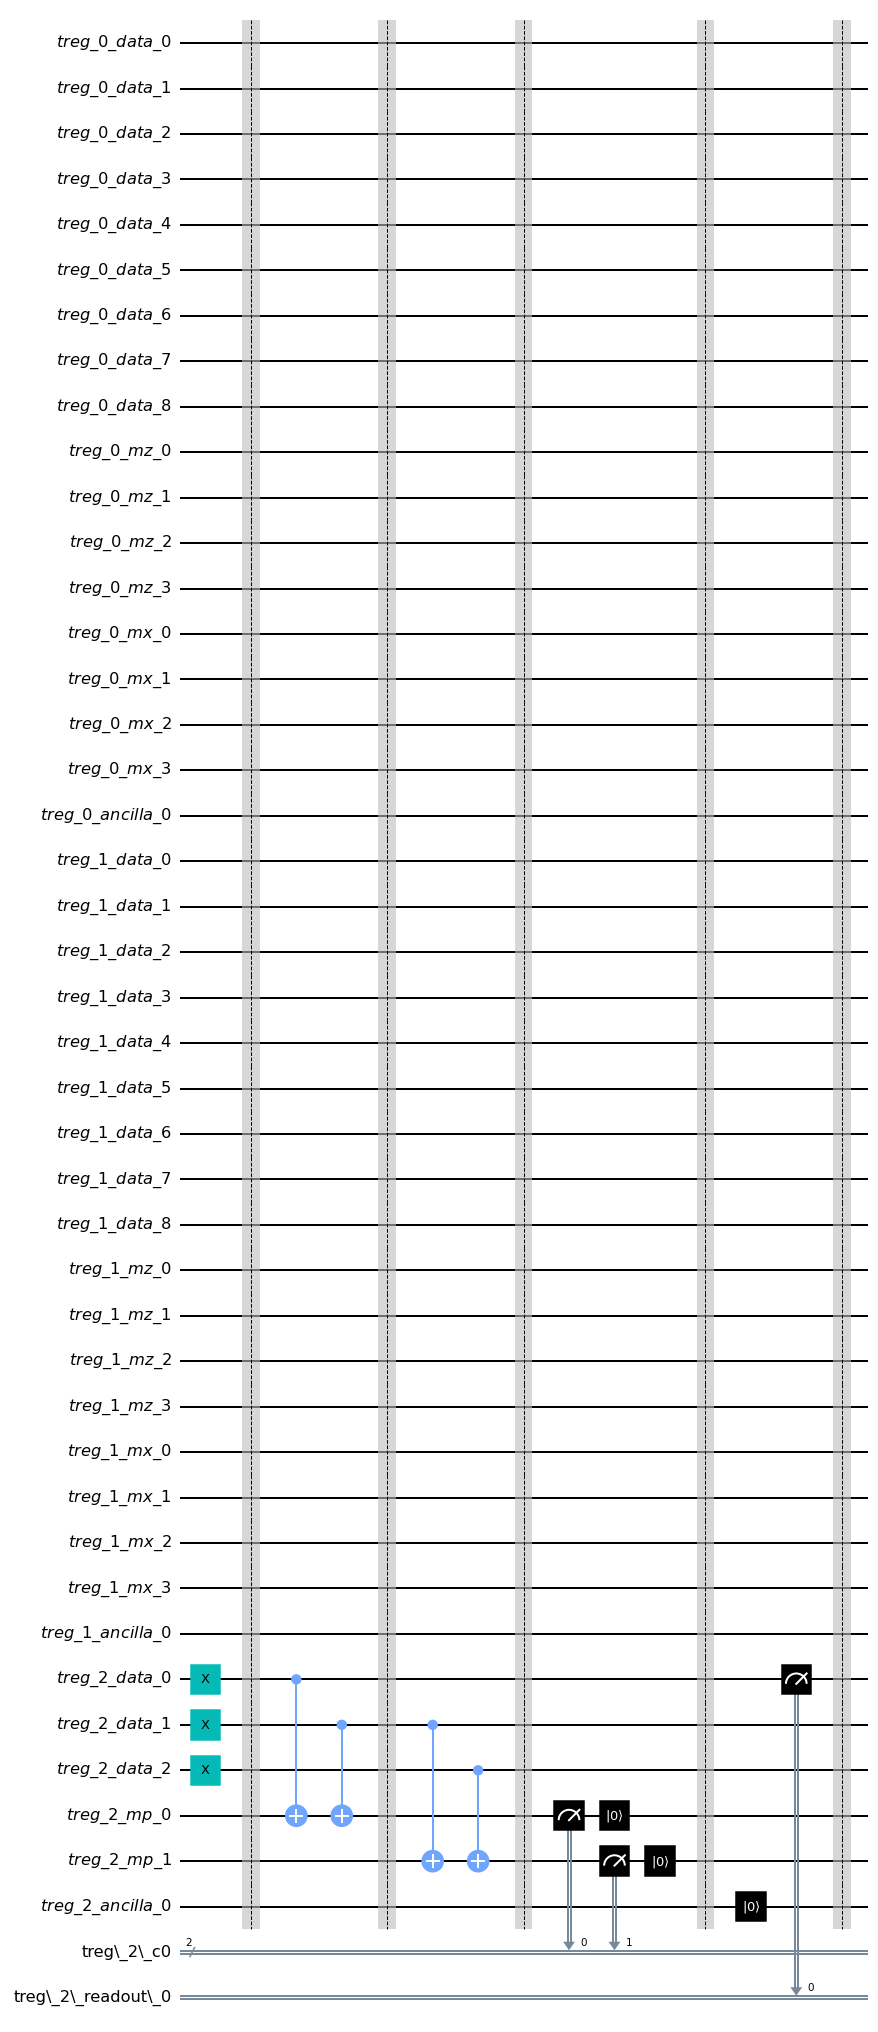

In [33]:
treg = TopologicalRegister(ctypes=[XXZZ, XZZX, REPETITION], params=[{"d": 3}, {"d":3}, {"d":3}])
tcirc = TopologicalCircuit(treg)
tcirc.x(2)
tcirc.stabilize(2)
tcirc.measure_z(2)
tcirc.draw(output='mpl', fold=500)

# Simulate

In [34]:
from qiskit import execute, Aer
def sim(circ):
    return execute(circ, 
                  Aer.get_backend("aer_simulator"), 
                  shots=10,
                 ).result().get_counts()

In [35]:
print(sim(tcirc.circ))

{'1 00': 10}


# CNOT (XXZZ and XZZX)

In [36]:
treg = TopologicalRegister(ctypes=[XXZZ, XZZX], params=[{"d": 3}, {"d":3}])
tcirc = TopologicalCircuit(treg)

# prep state
tcirc.reset_z(0)
tcirc.reset_z(1)
tcirc.x(0)
tcirc.x(1)

# cnot
tcirc.cx(0,1)

# meas
tcirc.measure_z(0)
tcirc.measure_z(1)

results = sim(tcirc.circ)
results = set([result[:3] for result in results.keys()])
print("q1 q0")
print(results)

AttributeError: 'XXZZQubit' object has no attribute 'params'

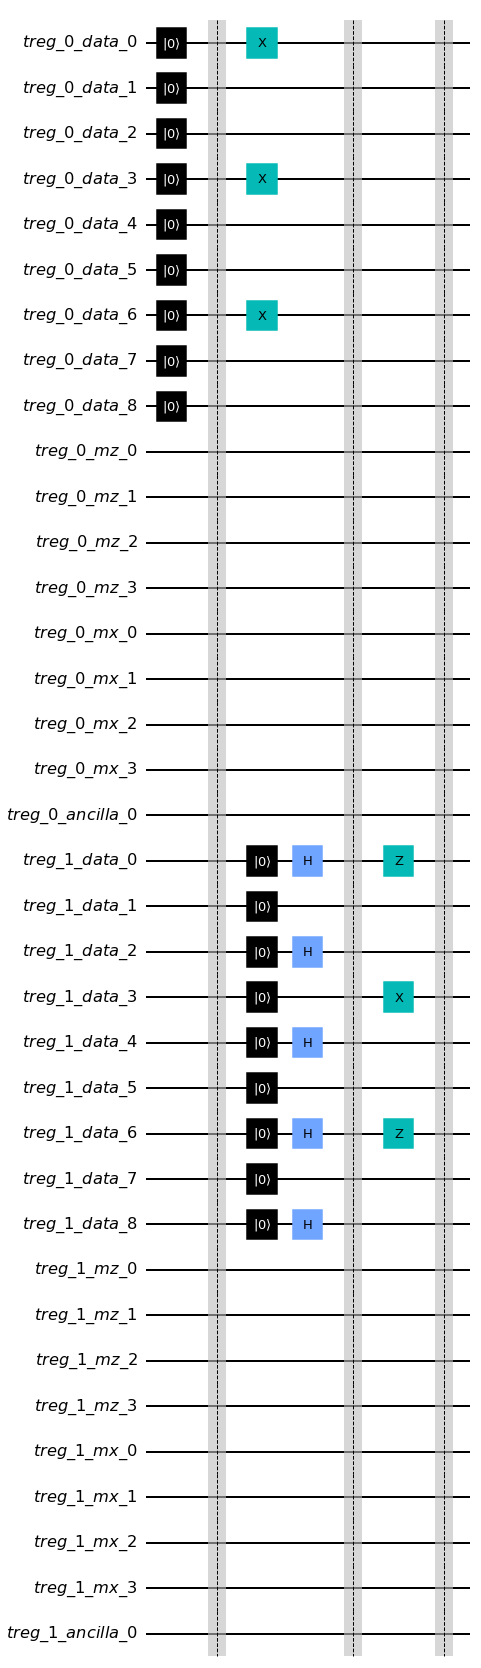

In [37]:
tcirc.draw(output='mpl', fold=500)

# CNOT (XZZX and REPETITION)

In [38]:
treg = TopologicalRegister(ctypes=[XZZX, REPETITION], params=[{"d": 3}, {"d":3}])
tcirc = TopologicalCircuit(treg)

# prep state
tcirc.reset_z(0)
tcirc.reset_z(1)
tcirc.x(0)
tcirc.x(1)

# cnot
tcirc.cx(0,1)

# meas
tcirc.measure_z(0)
tcirc.measure_z(1)

results = sim(tcirc.circ)
results = set([result[:3] for result in results.keys()])
print("q1 q0")
print(results)

AttributeError: 'XZZXQubit' object has no attribute 'params'

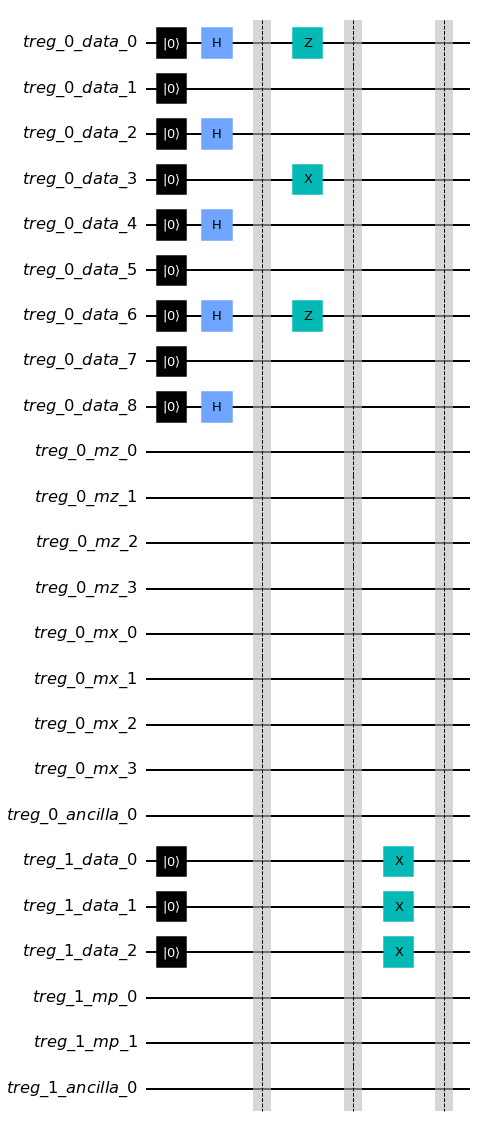

In [39]:
tcirc.draw(output='mpl', fold=500)

# CNOT (REPETITION and XZZX)

In [40]:
treg = TopologicalRegister(ctypes=[REPETITION, XZZX], params=[{"d": 3}, {"d":3}])
tcirc = TopologicalCircuit(treg)

# prep state
tcirc.reset_z(0)
tcirc.reset_z(1)
tcirc.x(0)
tcirc.x(1)

# cnot
tcirc.cx(0,1)

# meas
tcirc.measure_z(0)
tcirc.measure_z(1)

results = sim(tcirc.circ)
results = set([result[:3] for result in results.keys()])
print("q1 q0")
print(results)

AttributeError: 'RepetitionQubit' object has no attribute 'params'

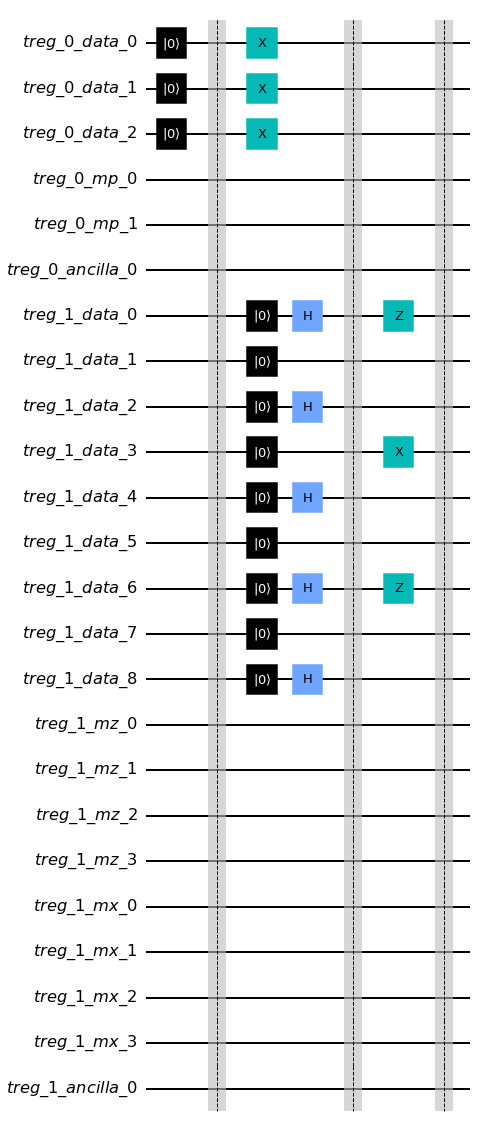

In [41]:
tcirc.draw(output='mpl', fold=500)